1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


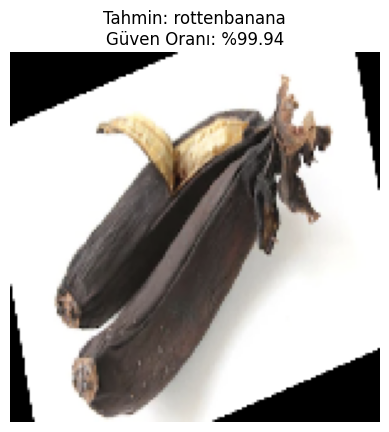

Model bu resmin 'rottenbanana' olduğuna %99.94 emin.


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# --- 1. MODELİ YÜKLE ---
model = tf.keras.models.load_model('../models/fruit_cnn_model.h5')

# Sınıf isimlerini elle yazıyoruz (Alfabetik sıra çok önemli!)
class_names = ['freshapples', 'freshbanana', 'freshoranges', 
               'rottenapples', 'rottenbanana', 'rottenoranges']

# --- 2. TEST EDİLECEK RESMİN YOLU ---
# Buraya bilgisayarındaki herhangi bir resmin yolunu yapıştıracaksın.
# Örnek: Masaüstüne indirdiğin 'elma.jpg'
img_path = '../data/raw/test/rottenbanana/rotated_by_15_Screen Shot 2018-06-12 at 8.56.16 PM.png' 
# (Yukarıdaki satırı, denemek istediğin resmin yoluyla değiştirebilirsin)

# Resmi modele uygun hale getir
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) # Tek resim olduğu için boyut ekle
img_array /= 255.0 # Normalize et

# --- 3. TAHMİN ET ---
prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
predicted_class_name = class_names[predicted_class_index]
confidence = np.max(prediction) * 100 # Güven oranı

# --- 4. SONUCU GÖSTER ---
plt.imshow(img)
plt.axis('off')
plt.title(f"Tahmin: {predicted_class_name}\nGüven Oranı: %{confidence:.2f}")
plt.show()

print(f"Model bu resmin '{predicted_class_name}' olduğuna %{confidence:.2f} emin.")